In [1]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import bs4
from pprint import pprint

In [2]:
# Get team ID based on team name
def get_team_id(team):
  for team in teams:
    if team['teamName'] == team:
      return team['teamId']
  
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  

In [3]:
# Load teams file
teams = requests.get('https://www.espn.com/mens-college-basketball/team/stats/_/id/194/ohio-state-buckeyes')
# Load players file
players =requests.get('https://www.espn.com/mens-college-basketball/team/roster/_/id/194')

In [4]:
print (teams.text)


        <!doctype html>
        <html lang="en">
            <head>
                <meta charSet="utf-8" />

                <!-- ESPNFITT | b695ef7a322d | 5661 | e35d1d0c5a9fdb9f50664d1f5e7498744e888671 | Mon, 25 Apr 2022 23:37:22 GMT -->
                <script type="text/javascript" src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" async></script>
                <script type="text/javascript">
        ;(function(){
            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(100)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;
            _nr && window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1]

In [5]:
soup = bs4.BeautifulSoup(teams.text,"html.parser")

In [6]:
pprint (soup)


<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<!-- ESPNFITT | b695ef7a322d | 5661 | e35d1d0c5a9fdb9f50664d1f5e7498744e888671 | Mon, 25 Apr 2022 23:37:22 GMT -->
<script async="" src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script>
<script type="text/javascript">
        ;(function(){
            function gc(n){n=document.cookie.match("(^|;) ?"+n+"=([^;]*)(;|$)");return n?n[2]:null}function sc(n){document.cookie=n}function smpl(n){n/=100;return!!n&&Math.random()<=n}var _nr=!1,_nrCookie=gc("_nr");null!==_nrCookie?"1"===_nrCookie&&(_nr=!0):smpl(100)?(_nr=!0,sc("_nr=1; path=/")):(_nr=!1,sc("_nr=0; path=/"));;
            _nr && window.NREUM||(NREUM={});NREUM.init={distributed_tracing:{enabled:true}};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)re

In [7]:
t=soup.find("table")

In [8]:
links = t.find_all("a")
pprint(links)

[<a class="AnchorLink" data-player-uid="s:40~l:41~a:4432821" href="https://www.espn.com/mens-college-basketball/player/_/id/4432821/ej-liddell" tabindex="0">E.J. Liddell</a>,
 <a class="AnchorLink" data-player-uid="s:40~l:41~a:4565201" href="https://www.espn.com/mens-college-basketball/player/_/id/4565201/malaki-branham" tabindex="0">Malaki Branham</a>,
 <a class="AnchorLink" data-player-uid="s:40~l:41~a:4277974" href="https://www.espn.com/mens-college-basketball/player/_/id/4277974/kyle-young" tabindex="0">Kyle Young</a>,
 <a class="AnchorLink" data-player-uid="s:40~l:41~a:4432401" href="https://www.espn.com/mens-college-basketball/player/_/id/4432401/zed-key" tabindex="0">Zed Key</a>,
 <a class="AnchorLink" data-player-uid="s:40~l:41~a:4277978" href="https://www.espn.com/mens-college-basketball/player/_/id/4277978/jamari-wheeler" tabindex="0">Jamari Wheeler</a>,
 <a class="AnchorLink" data-player-uid="s:40~l:41~a:4278141" href="https://www.espn.com/mens-college-basketball/player/_/id

In [9]:
%matplotlib inline

In [10]:
import requests
resp = requests.get(
    "https://www.basketball-reference.com/players/b/balllo01/shooting/2021")
resp

<Response [200]>

In [11]:
from bs4 import BeautifulSoup, Comment
content = BeautifulSoup(resp.content, 'html.parser')
print(content.prettify()[0:500])

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/deploy/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204185" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <s


In [12]:
comments = content.find_all(text=lambda text:isinstance(text, Comment))
comments[:5]

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ']

In [13]:
shots_html = comments
shots_html

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ',
 ' CSS END ',
 ' JS START ',
 ' JS END ',
 ' include:end ="/inc/klecko_header_bbr.html_f" ',
 ' HeaderSeoSocial ',
 ' HeaderSeoSocial:END ',
 ' tiles, touch, favicons ',
 '[if IE]>\n    <link rel="shortcut icon"                                href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204185/favicons/bbr/favicon.ico"><![endif]',
 ' tiles, touch, favicons:end ',
 ' ad code: begin ',
 ' ad code:end ',
 ' ul.user ',
 ' div#nav ',
 ' div.search ',
 ' div#header ',
 ' div.media-item ',
 ' all other pages ',
 ' div#meta ',
 ' div#fs_fs_300_atf  ',
 ' /div.#fs_fs_300_atf ',
 ' div#info ',
 ' div#fs_fs_728_atf  ',
 ' /div.#fs_fs_728_atf ',
 ' div#srcom ',
 ' div#inner_nav ',
 ' fs_general_header ',
 ' div#fs_fs_general_header  ',
 ' /div.#fs_fs_g

In [14]:
shots_string = str(shots_html)

In [15]:
shots_string

'[\' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) \', \' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) \', \' include:start ="/inc/klecko_header_bbr.html_f" \', \' no:cookie fast load the css.           \', \' CSS start \', \' CSS END \', \' JS START \', \' JS END \', \' include:end ="/inc/klecko_header_bbr.html_f" \', \' HeaderSeoSocial \', \' HeaderSeoSocial:END \', \' tiles, touch, favicons \', \'[if IE]>\\n    <link rel="shortcut icon"                                href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204185/favicons/bbr/favicon.ico"><![endif]\', \' tiles, touch, favicons:end \', \' ad code: begin \', \' ad code:end \', \' ul.user \', \' div#nav \', \' div.search \', \' div#header \', \' div.media-item \', \' all other pages \', \' div#meta \', \' div#fs_fs_300_atf  \', \' /div.#fs_fs_300_atf \', \' div#info \', \' div#fs_fs_728_atf  \', \' /div.#fs_fs_728_atf \', \' div#srcom \', \' div#inner_nav \', \' fs_general_header \', \' div#fs_fs_g

In [16]:
import re

shot_loc_text = re.findall('top:\d+px;left:\d+px', shots_string)
shot_loc_text[:5]

['top:194px;left:450px',
 'top:307px;left:176px',
 'top:146px;left:18px',
 'top:40px;left:0px',
 'top:38px;left:294px']

In [17]:
shot_loc = []
for i in range(len(shot_loc_text)):
    shot = shot_loc_text[i]
    nums = re.findall('\d+', shot)
    shot_loc.append([nums[0],nums[1]])
shot_loc[:5]

[['194', '450'], ['307', '176'], ['146', '18'], ['40', '0'], ['38', '294']]

In [18]:
len(shot_loc)

697

In [19]:
shot_res = re.findall('remaining<br>[^\d]+', shots_string)
shot_res = [shot_res[i][13:-1] for i in range(len(shot_res))]
shot_res[:5]

['Made', 'Missed', 'Missed', 'Missed', 'Missed']

In [20]:
shot_opp = re.findall('LAL [av][ts] \w+', shots_string)
shot_opp = [shot_opp[i][7:] for i in range(len(shot_opp))]
shot_opp[:5]

[]

In [21]:
# Data and NBA API
import pandas as pd
import numpy as np

from scipy.stats import norm, gaussian_kde, percentileofscore

pd.options.display.max_columns = None
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# For Shot Chart
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

sns.set_style('white')
sns.set_color_codes()

In [22]:
def get_player_shotchartdetail(player_name, season_id):
    """
    Parameters
    ----------
    player_name: name of the player with Capital
    season_id: ex. 2021-22
    """
    
    # player dictionary
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    
    # career df
    career = playercareerstats.PlayerCareerStats(player_id=player_dict['id'])
    career_df = career.get_data_frames()[0]
    
    # team id during the season
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    
    # shotchardtdetail endpoint
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id), 
                                                   player_id=int(player_dict['id']), 
                                                   season_type_all_star='Regular Season', 
                                                   season_nullable=season_id,
                                                   context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [23]:
player_shotchart_df, league_avg = get_player_shotchartdetail('Cam Thomas', '2021-22')

In [24]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100001,640,1630560,Cam Thomas,1610612751,Brooklyn Nets,4,3,27,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-82,146,1,0,20211019,MIL,BKN
1,Shot Chart Detail,0022100001,687,1630560,Cam Thomas,1610612751,Brooklyn Nets,4,0,35,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,233,129,1,0,20211019,MIL,BKN
2,Shot Chart Detail,0022100044,654,1630560,Cam Thomas,1610612751,Brooklyn Nets,4,3,44,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,5,250,1,0,20211025,BKN,WAS
3,Shot Chart Detail,0022100044,674,1630560,Cam Thomas,1610612751,Brooklyn Nets,4,1,40,Missed Shot,Fadeaway Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,16,83,143,1,0,20211025,BKN,WAS
4,Shot Chart Detail,0022100044,683,1630560,Cam Thomas,1610612751,Brooklyn Nets,4,0,26,Missed Shot,Driving Layup Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,40,57,1,0,20211025,BKN,WAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Shot Chart Detail,0022101180,488,1630560,Cam Thomas,1610612751,Brooklyn Nets,3,0,47,Missed Shot,Step Back Bank Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,17,260,1,0,20220405,BKN,HOU
499,Shot Chart Detail,0022101191,227,1630560,Cam Thomas,1610612751,Brooklyn Nets,2,7,32,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,16,75,152,1,0,20220406,NYK,BKN
500,Shot Chart Detail,0022101216,182,1630560,Cam Thomas,1610612751,Brooklyn Nets,2,10,56,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-94,251,1,1,20220410,BKN,IND
501,Shot Chart Detail,0022101216,201,1630560,Cam Thomas,1610612751,Brooklyn Nets,2,9,26,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,15,264,1,0,20220410,BKN,IND


In [25]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

In [26]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
6,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [27]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [28]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [29]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

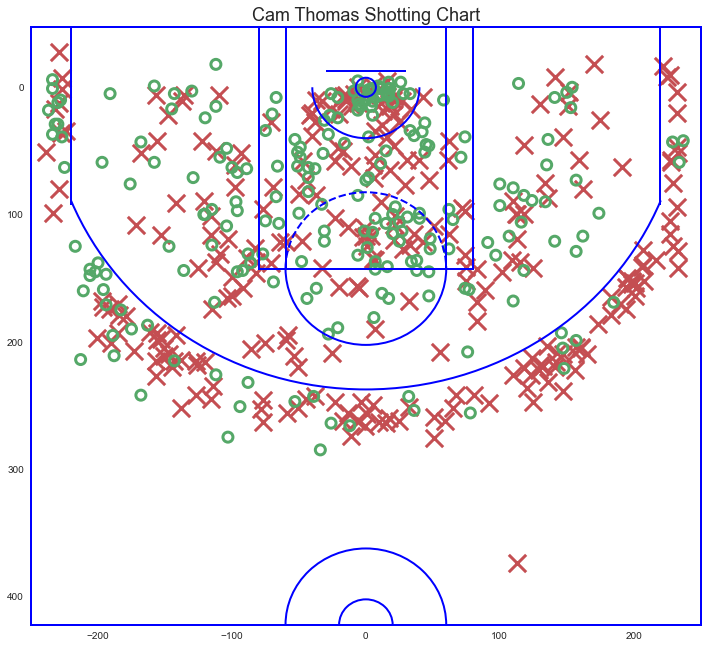

FG%:  0.433 (218-503)


In [31]:
shot_chart(player_shotchart_df, title="Cam Thomas Shotting Chart")
plt.show()
print("FG%: ", "{0:.3f}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))

In [32]:
def sized_hexbin(ax, hc, hc2, cmap, norm):
    offsets = hc.get_offsets()
    orgpath = hc.get_paths()[0]
    verts = orgpath.vertices
    values1 = hc.get_array()
    values2 = hc2.get_array()
    ma = values1.max()
    patches = []

    for offset,val in zip(offsets,values1):
        # Adding condition for minimum size 
        # offset is the respective position of each hexagons
        
        # remove 0 to compare frequency without 0s
        filtered_list = list(filter(lambda num: num != 0, values1))
        
        # we also skip frequency counts that are 0s
        # this is to discount hexbins with no occurences
        # default value hexagons are the frequencies
        if (int(val) == 0):
            continue
        elif (percentileofscore(filtered_list, val) < 33.33):
            #print(percentileofscore(values1, val))
            #print("bot")
            v1 = verts*0.3 + offset
        elif (percentileofscore(filtered_list, val) > 69.99):
            #print(percentileofscore(values1, val))
            #print("top")
            v1 = verts + offset
        else:
            #print("mid")
            v1 = verts*0.6 + offset
        
        path = Path(v1, orgpath.codes)
        patch = PathPatch(path)
        patches.append(patch)

    pc = PatchCollection(patches, cmap=cmap, norm=norm)
    # sets color
    # so hexbin with C=data['FGP']
    pc.set_array(values2)

    ax.add_collection(pc)
    hc.remove()
    hc2.remove()

def hexmap_chart(data, league_avg, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="white",
               court_color="#1a477b", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):
    
    LA = league_avg.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
    LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
    player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
    player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
    player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  

    data = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')
    
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor(court_color)

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    x = data['LOC_X']
    y = data['LOC_Y']
        
    # for diverging color map
    colors = ['#2b7cb6', '#abd9e9', '#ffffbf', '#fdaf61', '#d7191c', '#dddddd' ]
    cmap = ListedColormap(colors)
    # The 5 colors are separated by -9, -3, 0, 3, 9
    boundaries = [-np.inf, -9, -3, 0, 3, 9, np.inf]
    norm = BoundaryNorm(boundaries, cmap.N, clip=True)   
    
    # first hexbin required for bincount
    # second hexbin for the coloring of each hexagons
    hexbin = ax.hexbin(x, y, gridsize=40, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
    hexbin2 = ax.hexbin(x, y, C=data['FGP'], gridsize=40, cmap=cmap, norm=norm, extent=[-275, 275, -50, 425])
    sized_hexbin(ax, hexbin, hexbin2, cmap, norm) 
    
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

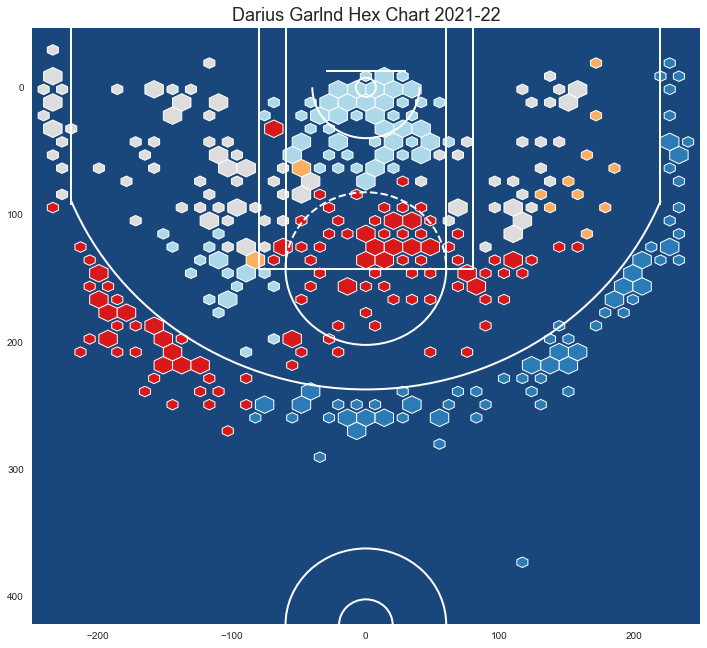

In [33]:
hexmap_chart(player_shotchart_df, league_avg, title="Darius Garlnd Hex Chart 2021-22")
plt.show()

In [34]:
def shot_zones(data, league_avg, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="black",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, ax=None, despine=False, **kwargs):
    
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor(court_color)

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)
    
    # draws the court
    # set shotzone to True
    draw_court(ax, color=line_color, lw=court_lw, shotzone=True, outer_lines=outer_lines)
    
    LA = league_avg.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
    LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
    print(LA)
    
    player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
    player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
    player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  
    print(player_vs_league)

    data = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    #ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='b', s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

                                         FGA    FGM       FGP
SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
Back Court(BC)        Back Court Shot    475     15  0.031579
Center(C)             16-24 ft.         4165   1743  0.418487
                      24+ ft.          16368   5613  0.342925
                      8-16 ft.         13865   6149  0.443491
                      Less Than 8 ft.  86338  50953  0.590157
Left Side Center(LC)  16-24 ft.         3972   1632  0.410876
                      24+ ft.          24924   8511  0.341478
Left Side(L)          16-24 ft.         1680    613  0.364881
                      24+ ft.          11377   4371  0.384196
                      8-16 ft.          7211   2972  0.412148
Right Side Center(RC) 16-24 ft.         4043   1575  0.389562
                      24+ ft.          23120   8171  0.353417
Right Side(R)         16-24 ft.         1609    614  0.381603
                      24+ ft.          10091   3855  0.382024
        

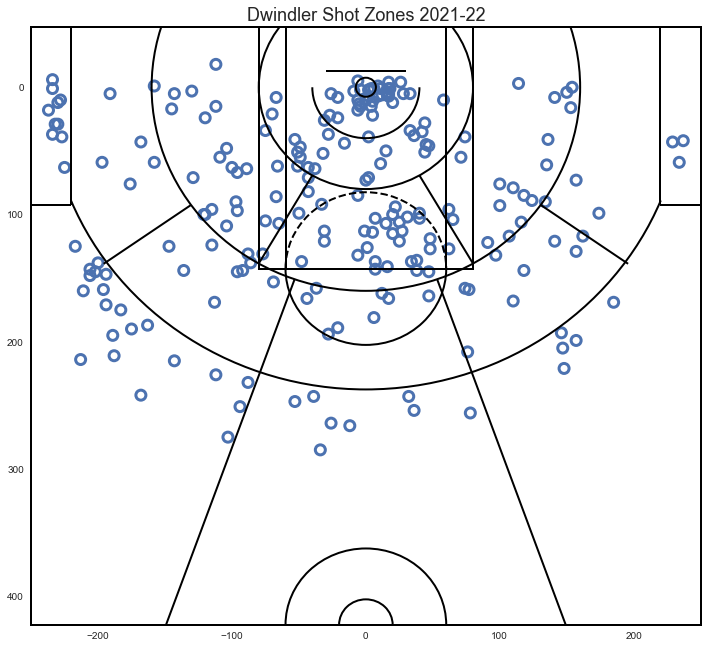

In [35]:
shot_zones(player_shotchart_df, league_avg, title="Dwindler Shot Zones 2021-22")

In [36]:
def heatmap(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="white",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)
    
    x = data['LOC_X']
    y = data['LOC_Y']
    
    sns.kdeplot(x, y, shade=True, cmap='inferno', ax=ax, **kwargs)

    ax.scatter(x, y, facecolors='w', s=2, linewidths=0.1, **kwargs)
    
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

/Users/bobbypaul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LOC_X', ylabel='LOC_Y'>

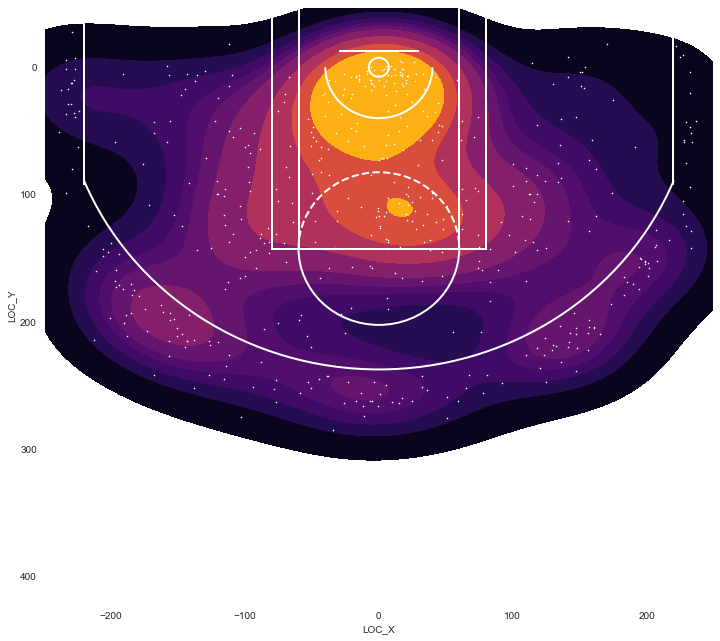

In [37]:
heatmap(player_shotchart_df)

In [39]:
player_shotchart_df, league_avg = get_player_shotchartdetail('Sam Hauser', '2021-22')

In [40]:
player_shotchart_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100243,598,1630573,Sam Hauser,1610612738,Boston Celtics,4,0,43,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,207,177,1,0,20211120,BOS,OKC
1,Shot Chart Detail,0022100256,649,1630573,Sam Hauser,1610612738,Boston Celtics,4,0,54,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,75,252,1,0,20211122,BOS,HOU
2,Shot Chart Detail,0022100408,640,1630573,Sam Hauser,1610612738,Boston Celtics,4,0,41,Made Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,25,54,254,1,1,20211213,BOS,MIL
3,Shot Chart Detail,0022100503,265,1630573,Sam Hauser,1610612738,Boston Celtics,2,5,51,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,219,114,1,1,20211227,MIN,BOS
4,Shot Chart Detail,0022100503,305,1630573,Sam Hauser,1610612738,Boston Celtics,2,3,28,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-148,211,1,0,20211227,MIN,BOS
5,Shot Chart Detail,0022100503,504,1630573,Sam Hauser,1610612738,Boston Celtics,4,11,41,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-179,191,1,0,20211227,MIN,BOS
6,Shot Chart Detail,0022100503,522,1630573,Sam Hauser,1610612738,Boston Celtics,4,9,1,Missed Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,228,-4,1,0,20211227,MIN,BOS
7,Shot Chart Detail,0022100518,451,1630573,Sam Hauser,1610612738,Boston Celtics,4,10,37,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,129,235,1,1,20211229,BOS,LAC
8,Shot Chart Detail,0022100518,468,1630573,Sam Hauser,1610612738,Boston Celtics,4,9,37,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,228,105,1,0,20211229,BOS,LAC
9,Shot Chart Detail,0022100518,525,1630573,Sam Hauser,1610612738,Boston Celtics,4,6,9,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,186,184,1,0,20211229,BOS,LAC


In [41]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

In [42]:
league_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
6,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [43]:
def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

In [44]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [45]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

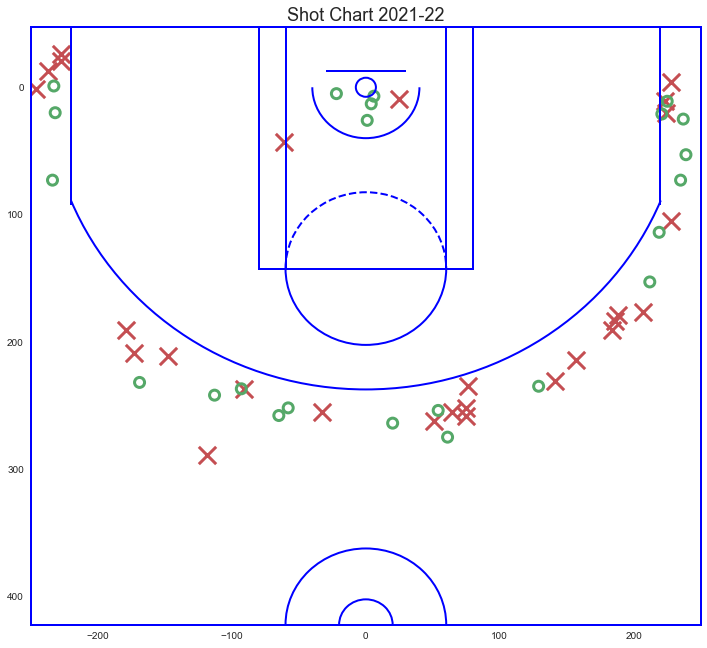

FG%:  0.460 (23-50)


In [46]:
shot_chart(player_shotchart_df, title="Shot Chart 2021-22")
plt.show()
print("FG%: ", "{0:.3f}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))

In [52]:
def shot_zones(data, league_avg, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="black",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, ax=None, despine=False, **kwargs):
    
    if ax is None:
        ax = plt.gca()
        ax.set_facecolor(court_color)

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)
    
    # draws the court
    # set shotzone to True
    draw_court(ax, color=line_color, lw=court_lw, shotzone=True, outer_lines=outer_lines)
    
    LA = league_avg.loc[:,['SHOT_ZONE_AREA','SHOT_ZONE_RANGE', 'FGA', 'FGM']].groupby(['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE']).sum()
    LA['FGP'] = 1.0*LA['FGM']/LA['FGA']
    print(LA)
    
    player = data.groupby(['SHOT_ZONE_AREA','SHOT_ZONE_RANGE','SHOT_MADE_FLAG']).size().unstack(fill_value=0)
    player['FGP'] = 1.0*player.loc[:,1]/player.sum(axis=1)
    player_vs_league = (player.loc[:,'FGP'] - LA.loc[:,'FGP'])*100  
    print(player_vs_league)

    data = pd.merge(data, player_vs_league, on=['SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE'], how='right')

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    #ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='b', s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

                                         FGA    FGM       FGP
SHOT_ZONE_AREA        SHOT_ZONE_RANGE                        
Back Court(BC)        Back Court Shot    475     15  0.031579
Center(C)             16-24 ft.         4165   1743  0.418487
                      24+ ft.          16368   5613  0.342925
                      8-16 ft.         13865   6149  0.443491
                      Less Than 8 ft.  86338  50953  0.590157
Left Side Center(LC)  16-24 ft.         3972   1632  0.410876
                      24+ ft.          24924   8511  0.341478
Left Side(L)          16-24 ft.         1680    613  0.364881
                      24+ ft.          11377   4371  0.384196
                      8-16 ft.          7211   2972  0.412148
Right Side Center(RC) 16-24 ft.         4043   1575  0.389562
                      24+ ft.          23120   8171  0.353417
Right Side(R)         16-24 ft.         1609    614  0.381603
                      24+ ft.          10091   3855  0.382024
        

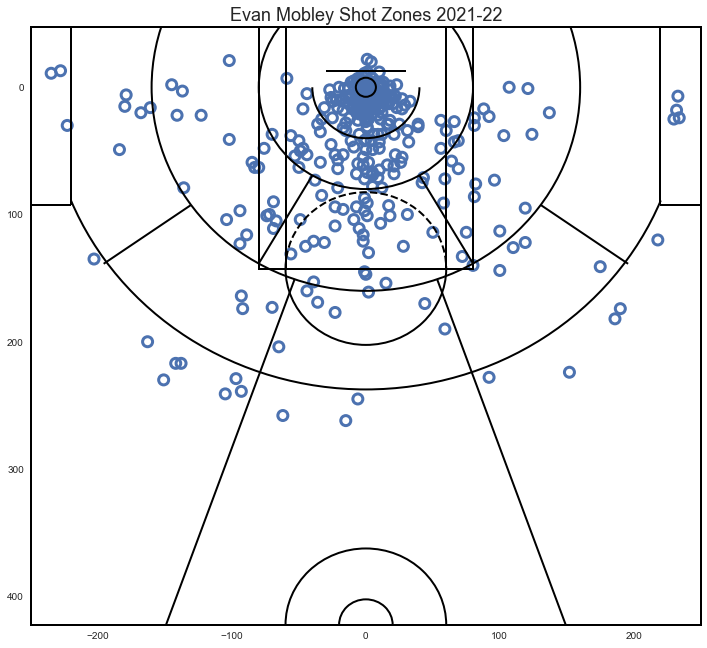

In [53]:
shot_zones(player_shotchart_df, league_avg, title="Evan Mobley Shot Zones 2021-22")

In [47]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    """ (None) -> None

    Draw a basketball court on an matplotlib figure.
    """
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    # Create the various parts of an NBA basketball court
    
    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system (9in / 12ft = .75; .75*10ft = 7.5ft)
    hoop = plt.Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = plt.Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    
# The paint
    # Create the outer box of the paint (width=16ft, height=19ft)
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)

    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)
    
# Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    
    
    if outer_lines:
        # Draw the half court line, baseline, and side outbound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
        
    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
    
    return ax


In [48]:
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['4277974']
  

In [49]:
player_shotchart_df['LOC_X'].isnull().any().any()

False

In [50]:
ncaale_avg

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT
0,League Averages,Above the Break 3,Back Court(BC),Back Court Shot,35,4,0.114
1,League Averages,Above the Break 3,Center(C),24+ ft.,16368,5613,0.343
2,League Averages,Above the Break 3,Left Side Center(LC),24+ ft.,24924,8511,0.341
3,League Averages,Above the Break 3,Right Side Center(RC),24+ ft.,23120,8171,0.353
4,League Averages,Backcourt,Back Court(BC),Back Court Shot,440,11,0.025
5,League Averages,In The Paint (Non-RA),Center(C),8-16 ft.,11777,5228,0.444
6,League Averages,In The Paint (Non-RA),Center(C),Less Than 8 ft.,23351,9813,0.420
7,League Averages,In The Paint (Non-RA),Left Side(L),8-16 ft.,2197,949,0.432
8,League Averages,In The Paint (Non-RA),Right Side(R),8-16 ft.,2343,1000,0.427
9,League Averages,Left Corner 3,Left Side(L),24+ ft.,11377,4371,0.384


In [51]:
def shot_chart(data, title="", color="b",
               xlim=(-250, 250), ylim=(422.5, -47.5), line_color="blue",
               court_color="white", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None, 
               ax=None, despine=False, **kwargs):

    if ax is None:
        ax = plt.gca()

    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])

    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=18)

    # draws the court
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    # separate color by make or miss    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']

    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']

    # plot missed shots
    ax.scatter(x_missed, y_missed, c='r', marker="x", s=300, linewidths=3, **kwargs)
    # plot made shots
    ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker="o", s=100, linewidths=3, **kwargs)
        
    # Set the spines to match the rest of court lines, makes outer_lines
    # somewhate unnecessary
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)

    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    return ax

In [52]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

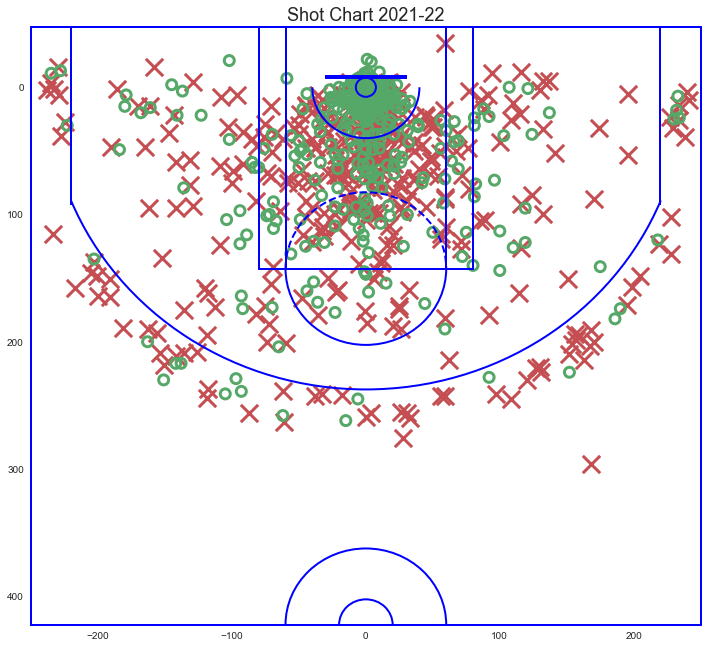

FG%:  0.508 (422-830)


In [53]:
shot_chart(player_shotchart_df, title="Shot Chart 2021-22")
plt.show()
print("FG%: ", "{0:.3f}".format(player_shotchart_df['SHOT_MADE_FLAG'].sum()/len(player_shotchart_df)), "({0}-{1})".format(player_shotchart_df['SHOT_MADE_FLAG'].sum(),len(player_shotchart_df)))

TypeError: draw_court() got an unexpected keyword argument 'shotzone'

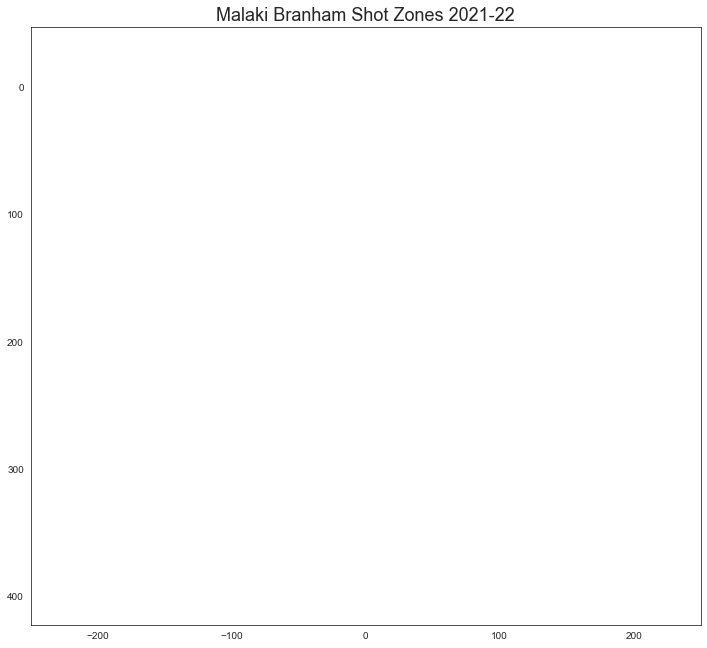

In [54]:
shot_zones(player_shotchart_df, league_avg, title="Malaki Branham Shot Zones 2021-22")

In [54]:
import requests
resp = requests.get(
    "https://www.basketball-reference.com/players/b/balllo01/shooting/2021")
resp

<Response [200]>

In [55]:
from bs4 import BeautifulSoup, Comment
content = BeautifulSoup(resp.content, 'html.parser')
print(content.prettify()[0:500])

<!DOCTYPE html>
<html class="no-js" data-root="/home/bbr/deploy/www" data-version="klecko-" itemscope="" itemtype="https://schema.org/WebSite" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport">
   <link href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204121" rel="dns-prefetch"/>
   <!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->
   <s


In [56]:
comments = content.find_all(text=lambda text:isinstance(text, Comment))
comments[:5]

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ']

In [57]:
shots_html = comments
shots_html

[' Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' End Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) ',
 ' include:start ="/inc/klecko_header_bbr.html_f" ',
 ' no:cookie fast load the css.           ',
 ' CSS start ',
 ' CSS END ',
 ' JS START ',
 ' JS END ',
 ' include:end ="/inc/klecko_header_bbr.html_f" ',
 ' HeaderSeoSocial ',
 ' HeaderSeoSocial:END ',
 ' tiles, touch, favicons ',
 '[if IE]>\n    <link rel="shortcut icon"                                href="https://d2p3bygnnzw9w3.cloudfront.net/req/202204121/favicons/bbr/favicon.ico"><![endif]',
 ' tiles, touch, favicons:end ',
 ' ad code: begin ',
 ' ad code:end ',
 ' ul.user ',
 ' div#nav ',
 ' div.search ',
 ' div#header ',
 ' div.media-item ',
 ' all other pages ',
 ' div#meta ',
 ' div#fs_fs_300_atf  ',
 ' /div.#fs_fs_300_atf ',
 ' div#info ',
 ' div#fs_fs_728_atf  ',
 ' /div.#fs_fs_728_atf ',
 ' div#srcom ',
 ' div#inner_nav ',
 ' fs_general_header ',
 ' div#fs_fs_general_header  ',
 ' /div.#fs_fs_g

In [58]:
import re

shot_loc_text = re.findall('top:\d+px;left:\d+px', shots_string)
shot_loc_text[:5]

['top:194px;left:450px',
 'top:307px;left:176px',
 'top:146px;left:18px',
 'top:40px;left:0px',
 'top:38px;left:294px']

In [59]:
shot_loc = []
for i in range(len(shot_loc_text)):
    shot = shot_loc_text[i]
    nums = re.findall('\d+', shot)
    shot_loc.append([nums[0],nums[1]])
shot_loc[:5]

[['194', '450'], ['307', '176'], ['146', '18'], ['40', '0'], ['38', '294']]

In [60]:
len(shot_loc)

697

In [61]:
shot_res = re.findall('remaining<br>[^\d]+', shots_string)
shot_res = [shot_res[i][13:-1] for i in range(len(shot_res))]
shot_res[:5]

['Made', 'Missed', 'Missed', 'Missed', 'Missed']

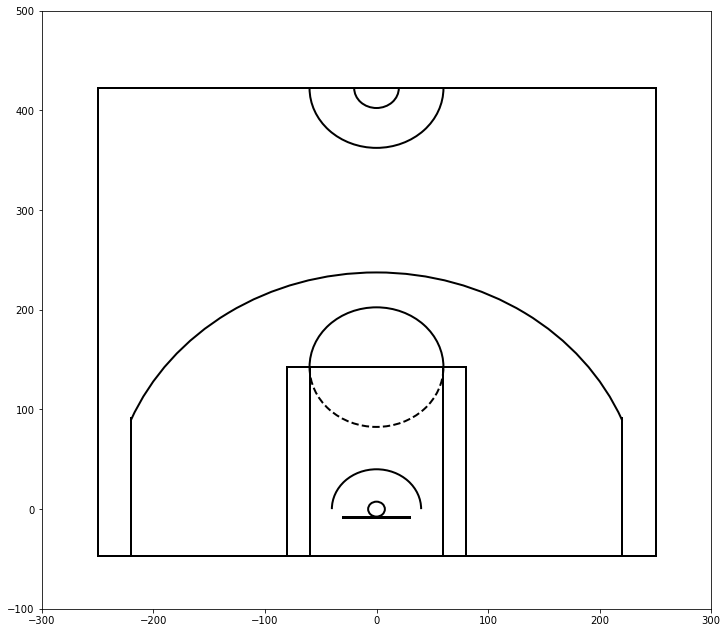

In [7]:
# Draw the court
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.savefig("court.png")
plt.show()


In [8]:
# Grab URL for scraping Steph Curry's shot chart data
shot_chart_url = ('https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18'
                  '&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division='
                  '&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode'
                  '=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome='
                  '&PORound=0&Period=0&PlayerID=201939&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5='
                  '&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment='
                  '&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0'
                  '&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5='
                  '&VsTeamID=')
shot_chart_url_2 = ('https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID=201939&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID=')
# headers are necessary in the requests.get call to simulate an actual web browser
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}

In [ ]:
# Get the webpage containing the data
response = requests.get(shot_chart_url, headers = headers)
# Grab the headers to be used as column headers for our DataFrame
headers = response.json()['resultSets'][0]['headers']
# Grab the shot chart data
shots = response.json()['resultSets'][0]['rowSet']

In [18]:
shots_df = pd.DataFrame(shots, columns=headers)

# View the head of the DataFrame and all its columns
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shots_df.head())

NameError: name 'shots' is not defined

In [19]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shots_df.LOC_X, shots_df.LOC_Y)
plt.show()

NameError: name 'sns' is not defined

In [17]:
shotchartdetail

<module 'nba_api.stats.endpoints.shotchartdetail' from '/Users/bobbypaul/opt/anaconda3/lib/python3.9/site-packages/nba_api/stats/endpoints/shotchartdetail.py'>

In [18]:
dir(shotchartdetail)

['AheadBehindNullable',
 'ClutchTimeNullable',
 'ConferenceNullable',
 'ContextMeasureSimple',
 'DivisionNullable',
 'EndPeriodNullable',
 'EndRangeNullable',
 'Endpoint',
 'GameSegmentNullable',
 'LastNGames',
 'LeagueID',
 'LocationNullable',
 'Month',
 'NBAStatsHTTP',
 'OutcomeNullable',
 'Period',
 'PlayerPositionNullable',
 'PointDiffNullable',
 'PositionNullable',
 'RangeTypeNullable',
 'SeasonNullable',
 'SeasonSegmentNullable',
 'SeasonTypeAllStar',
 'ShotChartDetail',
 'StartPeriodNullable',
 'StartRangeNullable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [19]:
dir(ShotChartDetail)

NameError: name 'ShotChartDetail' is not defined

In [20]:
# Create JSON request
shot_json = shotchartdetail.shotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

AttributeError: module 'nba_api.stats.endpoints.shotchartdetail' has no attribute 'shotChartDetail'

In [43]:
# Get the player ID number for LeBron James
get_player_id('LeBron', 'James')

2544

In [21]:
# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

NameError: name 'shot_json' is not defined

In [45]:
# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

NameError: name 'shot_data' is not defined

In [46]:
# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

NameError: name 'relevant_data' is not defined

In [47]:
# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

NameError: name 'rows' is not defined

In [48]:
# Print the columns of our DataFrame
curry_data.columns
>>> Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING', 'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE', 'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE', 'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE', 'HTM', 'VTM'], dtype='object')

SyntaxError: invalid syntax (915570705.py, line 3)

In [49]:
# Function to draw basketball court
def create_court(ax, color):

IndentationError: expected an indented block (454299120.py, line 2)

In [50]:
# Short corner 3PT lines
ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
ax.plot([220, 220], [0, 140], linewidth=2, color=color)

NameError: name 'ax' is not defined

In [51]:
# 3PT Arc
ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))

NameError: name 'ax' is not defined

In [52]:
# Lane and Key
ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
ax.plot([80, 80], [0, 190], linewidth=2, color=color)
ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
ax.plot([60, 60], [0, 190], linewidth=2, color=color)
ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

NameError: name 'ax' is not defined

In [53]:
# Rim
ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
# Backboard
ax.plot([-30, 30], [40, 40], linewidth=2, color=color)

NameError: name 'ax' is not defined

In [54]:
# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
    
# Set axis limits
ax.set_xlim(-250, 250)
ax.set_ylim(0, 470)

NameError: name 'ax' is not defined

NameError: name 'create_court' is not defined

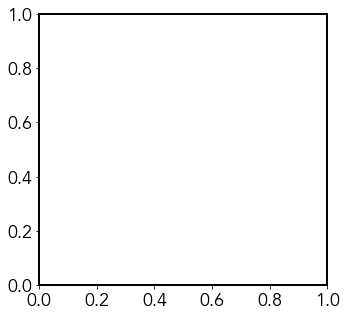

In [55]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()

In [56]:
# Plot hexbin of shots
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), cmap='Blues')

NameError: name 'curry_data' is not defined

In [57]:
# Plot hexbin of shots with logarithmic binning
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

NameError: name 'curry_data' is not defined

In [58]:
# Annotate player name and season
ax.text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

Text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season')

In [59]:
# JSON request for Giannis Antetokounmpo
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Milwaukee Bucks'),
            player_id = get_player_id('Giannis', 'Antetokounmpo'),
            context_measure_simple = 'PTS',
            season_nullable = '2018-19',
            season_type_all_star = 'Regular Season')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)